In [1]:
# Base Imports
import pandas as pd
import numpy as np
import sys
sys.path.append('../../../')

# Report Plots
from holisticai.bias.plots._bias_report_plots import (
    bias_report_regression,
    bias_report_classification,
)

from holisticai.datasets import load_adult
df = load_adult()['frame']

/home/kcosta/anaconda3/envs/holisticai/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
group_a = df['sex']=='Female'
group_b = df['sex']=='Male'

#### Regression Report

In [3]:
from holisticai.bias.metrics import regression_bias_metrics
y_true = df['age']
y_pred = np.random.random(y_true.shape) # synthetic predictions
metrics = regression_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')
metrics_mitigated = regression_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')

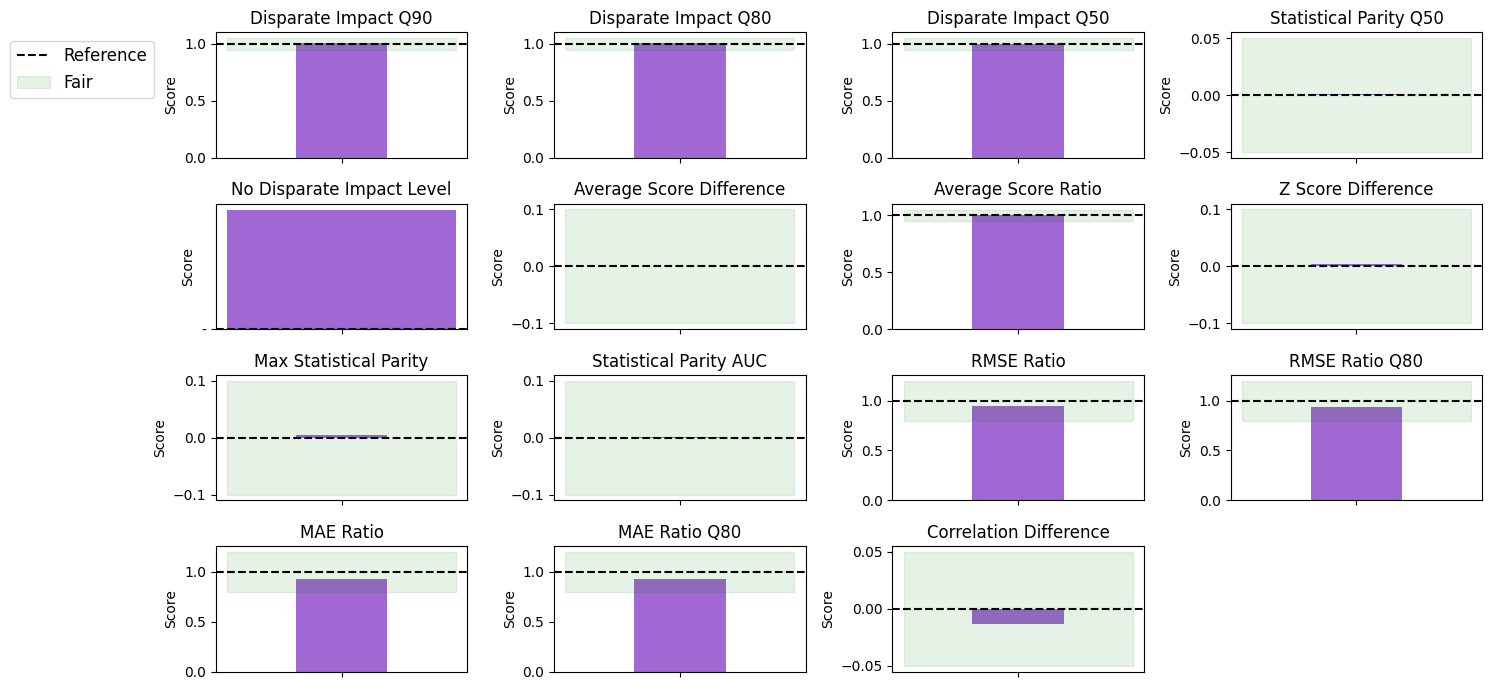

In [4]:
bias_report_regression(metrics)

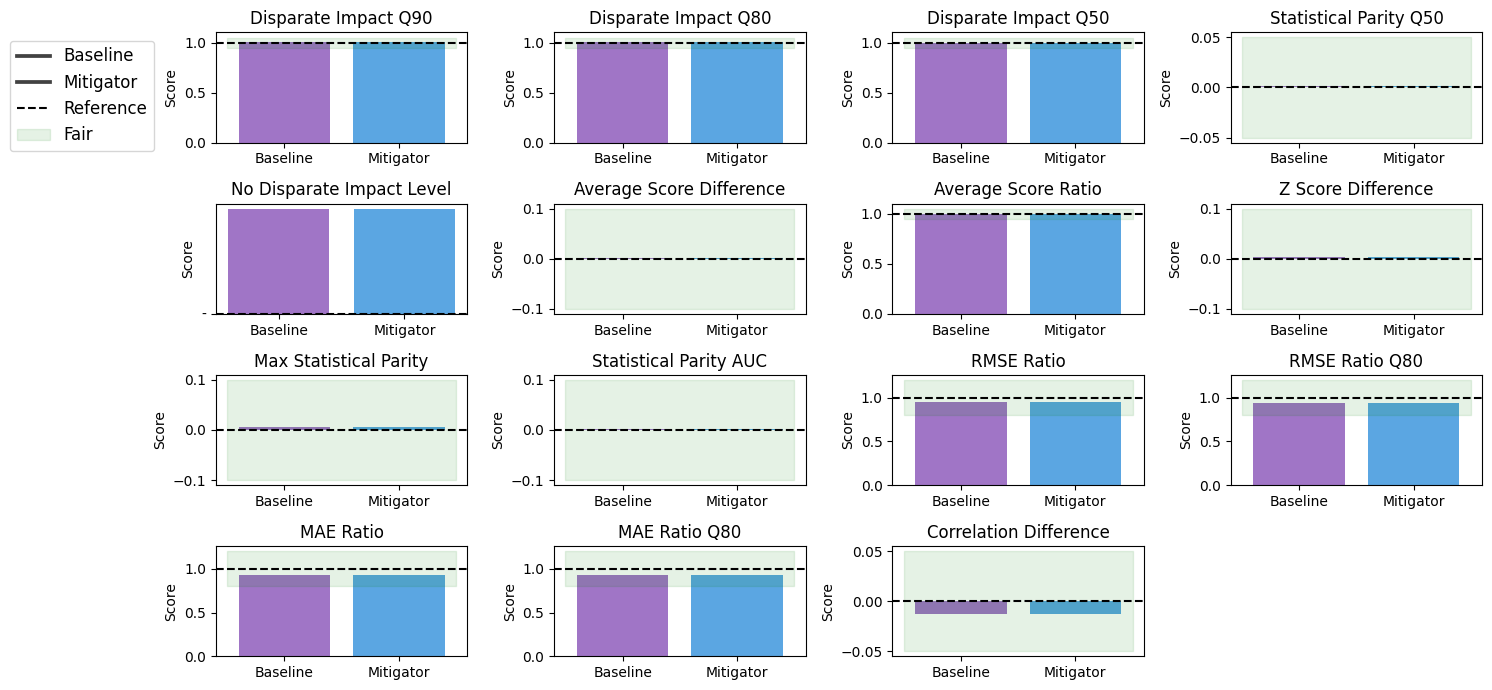

In [5]:
bias_report_regression(metrics, metrics_mitigated)

#### Classification Report

In [10]:
from holisticai.bias.metrics import classification_bias_metrics
df['class'] = df['class'].apply(lambda x: 1 if x == '>50K' else 0)
y_true = df['class']
y_pred = np.random.randint(2, size=y_true.shape) # synthetic predictions
metrics = classification_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')
mitigated = classification_bias_metrics(group_a, group_b, y_pred, y_true, metric_type = 'both')

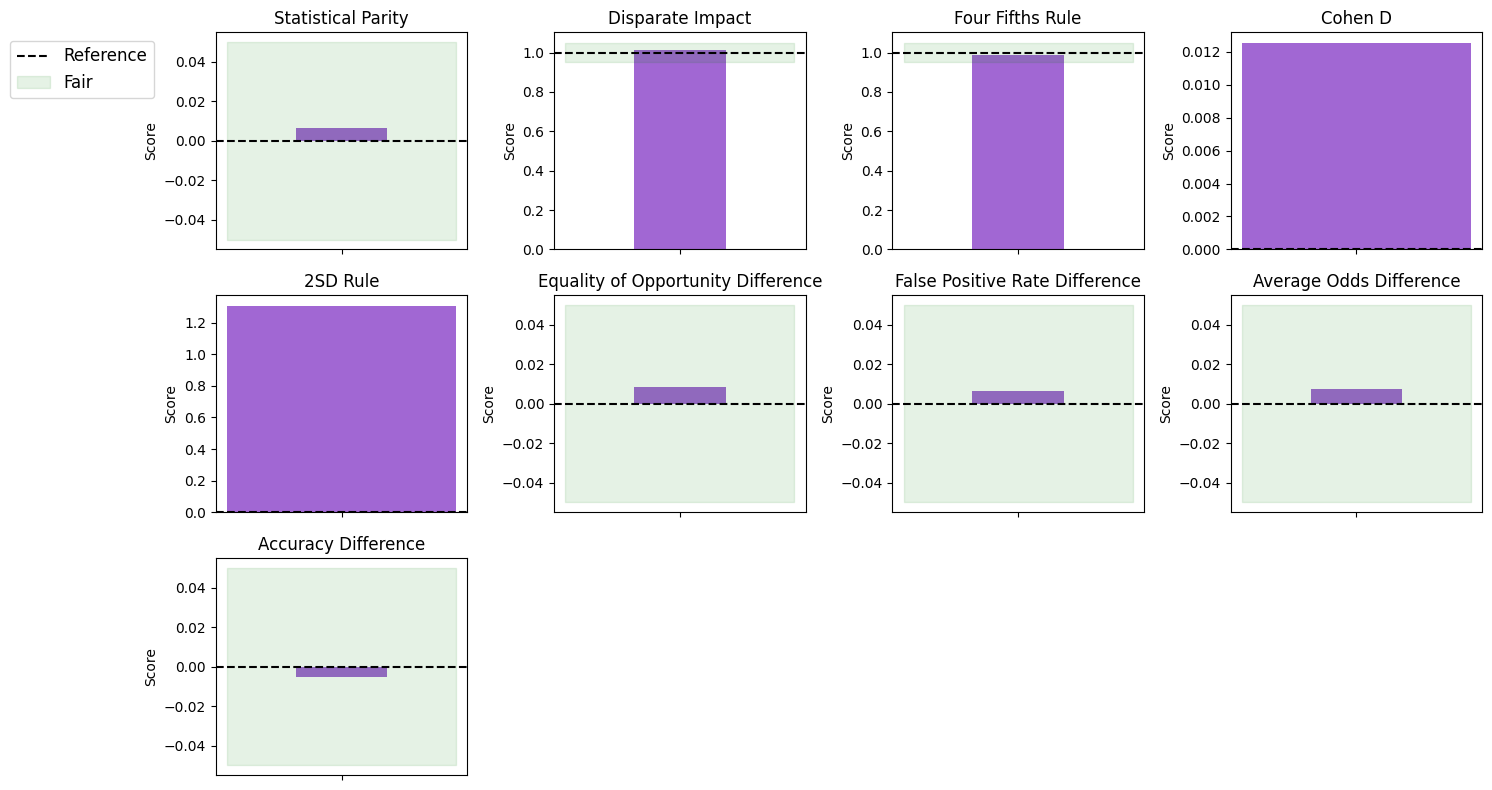

In [8]:
bias_report_classification(metrics)

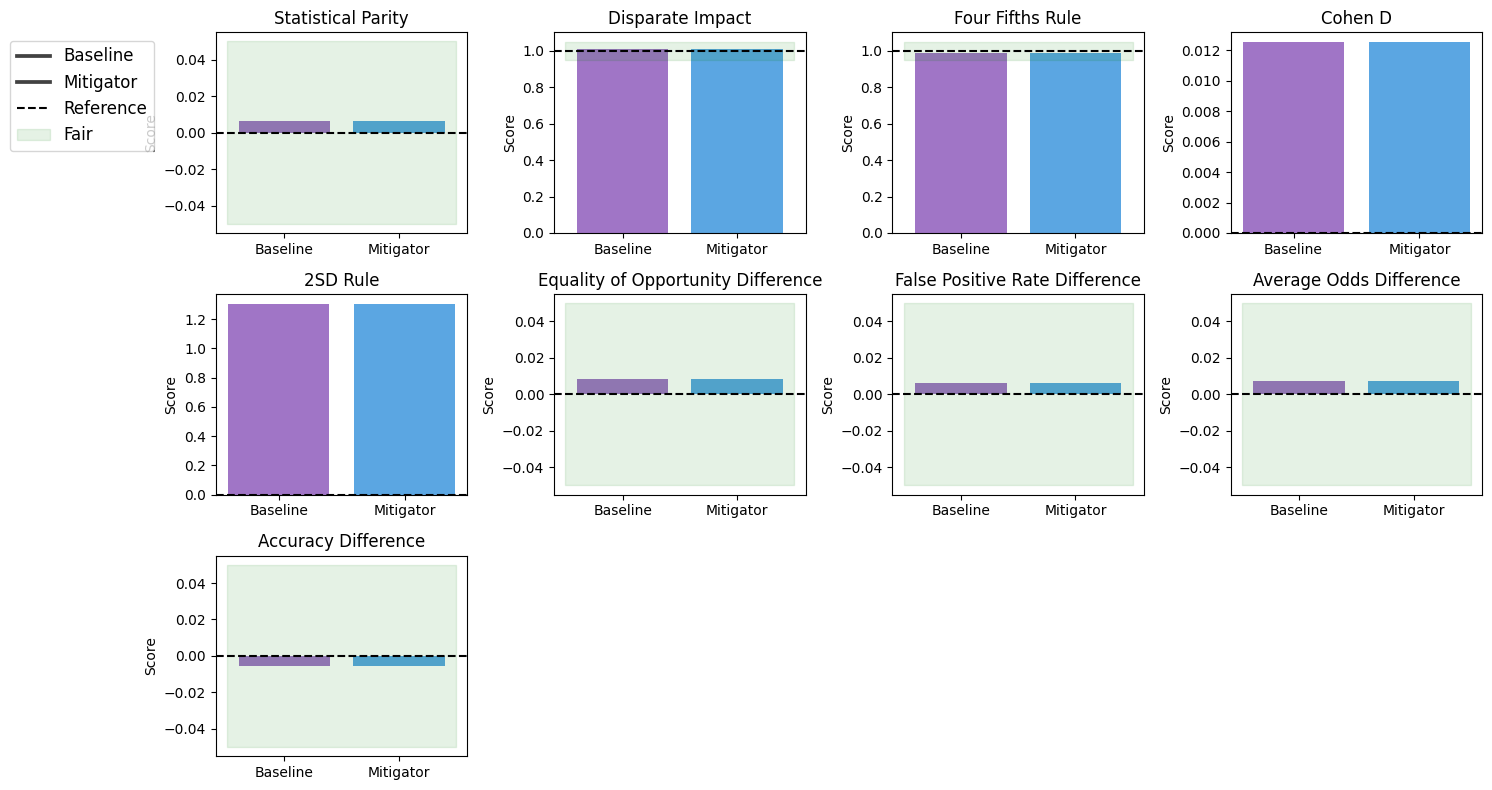

In [9]:
bias_report_classification(metrics, mitigated)